### Checking for missing values using isnull() and notnull()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


hfile=pd.read_csv("Data.csv",header=0)

df=pd.DataFrame(hfile)

print(df.isnull)
print(df.notnull)

<bound method DataFrame.isnull of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1

#### displaying data only with Selling_Price = NaN 

In [3]:
bool_sires=pd.isnull(hfile["Selling_Price"])

hfile[bool_sires]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner


### Filling missing values using fillna()
In order to fill null values in a datasets, we use fillna(), replace() and interpolate() function these function replace NaN values with some value of their own. All these function help in filling a null values in datasets of a DataFrame. Interpolate() function is basically used to fill NA values in the dataframe but it uses various interpolation technique to fill the missing values rather than hard-coding the value.

In [4]:
new_file=df.fillna(method="bfill")
# print(new_file)
df2=pd.DataFrame(new_file)
new_file.isnull().sum().sum()

0

### checking of distribution of categorical datas

In [5]:
print(df2.Fuel_Type.value_counts())
print(df2.Seller_Type.value_counts())
print(df2.Transmission.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


### encoding 

In [6]:
from dataclasses import replace

df2.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
df2.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)
df2.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

df2



,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


### spliting and training and test the data

In [7]:
from matplotlib.pyplot import axis


x=df2.drop(["Car_Name","Selling_Price"],axis=1)
y=df2["Selling_Price"]

x
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

### spliting and training and test the data

In [8]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.1, random_state=2)


### Model training

LinearRegression

In [9]:
le_reg_Mod=LinearRegression()

le_reg_Mod.fit(x_train, y_train)


LinearRegression()

### Model evaluation

In [10]:
train_data_pred = le_reg_Mod.predict(x_train)

error_r2 = metrics.r2_score(y_train, train_data_pred)

print("R squared error: ",error_r2)


R squared error:  0.8799451660493708


### visualize the actual price and pridect price 

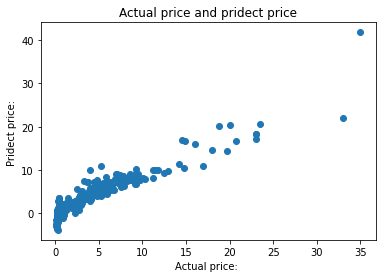

In [11]:
plt.scatter(y_train, train_data_pred)
plt.xlabel("Actual price: ")
plt.ylabel("Pridect price: ")
plt.title("Actual price and pridect price")
plt.show()

In [12]:
test_data_pred = le_reg_Mod.predict(x_test)

error_r2 = metrics.r2_score(y_test, test_data_pred)

print("R squared error: ",error_r2)

R squared error:  0.8365766715026374


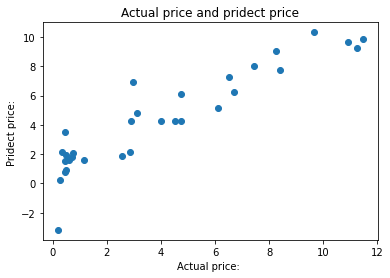

In [13]:
plt.scatter(y_test, test_data_pred)
plt.xlabel("Actual price: ")
plt.ylabel("Pridect price: ")
plt.title("Actual price and pridect price")
plt.show()

### lesso Regression

In [14]:
las_reg_Mod=Lasso()

las_reg_Mod.fit(x_train, y_train)


Lasso()

In [15]:
train_data_pred = las_reg_Mod.predict(x_train)

error_r2 = metrics.r2_score(y_train, train_data_pred)

print("R squared error: ",error_r2)


R squared error:  0.8427856123435794


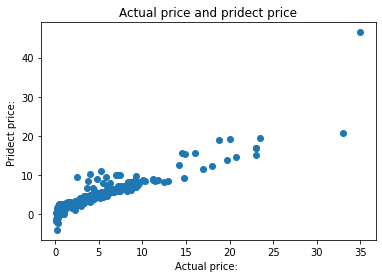

In [16]:
plt.scatter(y_train, train_data_pred)
plt.xlabel("Actual price: ")
plt.ylabel("Pridect price: ")
plt.title("Actual price and pridect price")
plt.show()

In [18]:
test_data_pred = las_reg_Mod.predict(x_test)

error_r2 = metrics.r2_score(y_test, test_data_pred)

print("R squared error: ",error_r2)

R squared error:  0.8709167941173195


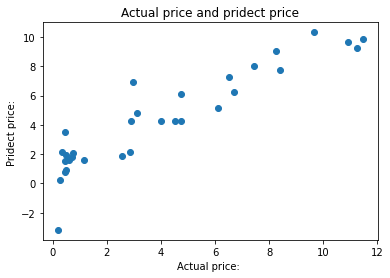

In [ ]:
plt.scatter(y_test, test_data_pred)
plt.xlabel("Actual price: ")
plt.ylabel("Pridect price: ")
plt.title("Actual price and pridect price")
plt.show()

### removing outliers

In [ ]:
import matplotlib.pyplot as plt

q1=df2.quantile(0.25)
q3=df2.quantile(0.75)

iqr=q3-q1

df2=(df2[~((df2<(q1-1.5*iqr)) | (df2>(q3+1.5*iqr)))])

df2

C:\Users\Niazi Wall\AppData\Local\Temp\ipykernel_17316\3997678208.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2=(df2[~((df2<(q1-1.5*iqr)) | (df2>(q3+1.5*iqr)))])


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014.0,3.35,5.59,27000.0,0.0,0,0.0,0.0
1,sx4,2013.0,4.75,9.54,43000.0,NaN,0,0.0,0.0
2,ciaz,2017.0,7.25,9.85,6900.0,0.0,0,0.0,0.0
3,wagon r,2011.0,2.85,4.15,5200.0,0.0,0,0.0,0.0
4,swift,2014.0,4.60,6.87,42450.0,NaN,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
296,city,2016.0,9.50,11.60,33988.0,NaN,0,0.0,0.0
297,brio,2015.0,4.00,5.90,60000.0,0.0,0,0.0,0.0
298,city,2009.0,3.35,11.00,87934.0,0.0,0,0.0,0.0
299,city,2017.0,11.50,12.50,9000.0,NaN,0,0.0,0.0


### Data Normalization 

MinMax and Z-score


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler=preprocessing.MinMaxScaler()

df_min_max_scaled = df2.copy()

for column in df_min_max_scaled.columns:
    df_min_max_scaled["Selling_Price"] = (df_min_max_scaled["Selling_Price"] - df_min_max_scaled["Selling_Price"].min()) / (df_min_max_scaled["Selling_Price"].max() - df_min_max_scaled["Selling_Price"].min())    
  
for column in df_min_max_scaled.columns:
    df_min_max_scaled["Kms_Driven"] = (df_min_max_scaled["Kms_Driven"] - df_min_max_scaled["Kms_Driven"].min()) / (df_min_max_scaled["Kms_Driven"].max() - df_min_max_scaled["Kms_Driven"].min())    
  

df_z_scaled = df_min_max_scaled.copy()

for column in df_z_scaled.columns:
    df_z_scaled["Kms_Driven"] = (df_z_scaled["Kms_Driven"] - df_z_scaled["Kms_Driven"].mean()) / df_z_scaled["Kms_Driven"].std()    
  
for column in df_z_scaled.columns:
    df_z_scaled["Selling_Price"] = (df_z_scaled["Selling_Price"] - df_z_scaled["Selling_Price"].mean()) / df_z_scaled["Selling_Price"].std()    
  


df_z_scaled


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014.0,-0.118358,5.59,-0.263679,0.0,0,0.0,0.0
1,sx4,2013.0,0.340621,9.54,0.482742,NaN,0,0.0,0.0
2,ciaz,2017.0,1.160227,9.85,-1.201370,0.0,0,0.0,0.0
3,wagon r,2011.0,-0.282279,4.15,-1.280677,0.0,0,0.0,0.0
4,swift,2014.0,0.291445,6.87,0.457084,NaN,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
296,city,2016.0,1.897872,11.60,0.062320,NaN,0,0.0,0.0
297,brio,2015.0,0.094740,5.90,1.275814,0.0,0,0.0,0.0
298,city,2009.0,-0.118358,11.00,2.578970,0.0,0,0.0,0.0
299,city,2017.0,2.553557,12.50,-1.103402,NaN,0,0.0,0.0
